In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Part 1 Read and Process Data

In [2]:
# Import packages
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from tqdm import tqdm

In [27]:
# read data
Fraud = pd.read_csv('Fraud_Data.csv')
IP = pd.read_csv('IpAddress_to_Country.csv')

In [4]:
# Check data types
Fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [6]:
# check if IP address is unique
Fraud[Fraud.duplicated(['ip_address'], keep=False)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1
77,392706,2015-01-07 08:15:53,2015-01-07 08:15:54,65,VRYLIRAQJIIIE,SEO,Opera,F,30,1.213105e+09,1
83,67592,2015-01-10 23:23:25,2015-01-10 23:23:26,38,ITUMJCKWEYNDD,Ads,Safari,M,43,3.874758e+09,1
111,352206,2015-01-06 21:48:13,2015-01-06 21:48:14,45,FRITFBEXOSJEI,Ads,IE,F,22,1.367518e+09,1
134,104061,2015-01-05 00:09:57,2015-01-05 00:09:58,23,XSEQHFFOYFICY,SEO,IE,M,33,2.011989e+09,1
141,348260,2015-01-10 17:13:50,2015-01-10 17:13:51,18,VOQAAYLLJLUII,SEO,Safari,M,27,7.989386e+08,1
160,121703,2015-01-06 08:56:42,2015-01-06 08:56:43,28,XAVNTONBKCVJS,Direct,Safari,M,34,2.890012e+09,1


In [7]:
# check if data contain missing value
Fraud.isnull().values.any()

False

In [4]:
# create a dictionary to store ip address, use the range of lower and upper bond as the key
IP['IpRange'] = list(zip(IP['lower_bound_ip_address'], IP['upper_bound_ip_address']))
del IP['lower_bound_ip_address']
del IP['upper_bound_ip_address']
IpDic = IP.set_index('IpRange').to_dict().get('country')

In [21]:
# extract a sample to write code first
Fraud = Fraud.head(100000)

In [6]:
# Method to locate the key by a value
def get_rate(dic, value):
    for key in dic:
        if key[0] <= value <= key[1]:
            return dic[key]

In [22]:
# Method to locate the key by a value for lambad 
def get_rate_apply(ip):
    for key in IpDic.keys():
        if key[0] <= ip: 
            if ip <= key[1]:
                return IpDic[key]


In [23]:
row = Fraud.loc[1]
print(row['ip_address'])
get_rate_apply(row['ip_address'])

350311387.866


'United States'

In [19]:
Fraud.shape

(151112, 11)

In [ ]:
%%time
Fraud['country'] = 'Others'
Fraud['country'] = Fraud['ip_address'].apply(lambda ip: get_rate_apply(ip))

In [ ]:
pd.to_csv('Farud_merge.csv')

In [25]:
Fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [12]:

# locate country by IP address
with tqdm(total=100) as pbar:
    Fraud['country'] = None
    for index, ip in enumerate(Fraud['ip_address']):
        Fraud['country'][index] = get_rate(IpDic, ip)

  0%|          | 0/100 [00:00<?, ?it/s]//anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



KeyboardInterrupt: 

In [12]:
writer = ExcelWriter('IPCOmbine.xlsx')
Fraud.to_excel(writer,'Sheet1')
writer.save()

NameError: name 'ExcelWriter' is not defined

In [79]:
# summary country distributions
Fraud['country'].value_counts()

United States                      3858
China                               837
Japan                               447
United Kingdom                      309
Korea Republic of                   292
Germany                             237
France                              209
Canada                              195
Brazil                              193
Australia                           130
Italy                               124
Netherlands                         102
Russian Federation                   94
Taiwan; Republic of China (ROC)      86
India                                83
Mexico                               72
Spain                                64
Sweden                               62
South Africa                         54
Indonesia                            47
Poland                               46
Norway                               45
Argentina                            45
Viet Nam                             42
Colombia                             42


##### Conclusion:
1. We have duplicated IP addresses
2. Some IP addresses cannot be located to a known country

# Part 2 Build Machine Learning Model 

Before jumping into building a model, think about whether you can create new powerful variables. This is called feature engineering and it is the most important step in machine learning. However, feature engineering is quite time consuming. In a take-home you should just give an idea of how you would do it and emphasize that with more time you would go deeper into it.

A few obvious variables that can be created here could be:
1. Time difference between sign-up time and purchase time
2. If the device id is unique or certain users are sharing the same device (many different user ids using the same device could be an indicator of fake accounts)
3. Same for the ip address. Many different users having the same ip address could be an indicator of fake accounts
4. Usual week of the year and day of the week from time variables

In [1]:
# convert time to correct datatype
Fraud['signup_time'] =  pd.to_datetime(Fraud['signup_time'], format='%Y-%m-%d %H:%M:%S')
Fraud['purchase_time'] =  pd.to_datetime(Fraud['purchase_time'], format='%Y-%m-%d %H:%M:%S')

# calculate time differences between sign up and purchase
Fraud['time_diffrence'] = (Fraud['purchase_time'] - Fraud['signup_time']).astype('timedelta64[h]')

NameError: name 'pd' is not defined

In [81]:
# check for each device id how many different users had it
Fraud[['device_id', 'user_id']].groupby('device_id').count().reset_index().sort_values(by=['user_id'], ascending=False).head(10)

,device_id,user_id
718,BWSMVSLCJXMCM,4
7639,UHCAPOHBEBXJW,4
1662,EIWWDKIBIWRWY,4
3917,KIPFSCNUGOLDP,4
3133,IGKYVZDBEGALB,4
1126,DABLZVBIMFUTE,4
909,CLOHCTJSXUXWA,4
2753,HGVNRPOHIBZLJ,3
1481,DWUZNKTPXIFZI,3
898,CJWVPNPXURMXB,3


In [82]:
# check for each ip address how many different users had it
Fraud[['ip_address', 'user_id']].groupby('ip_address').count().reset_index().sort_values(by=['user_id'], ascending=False).head(10)

,ip_address,user_id
1382,5.760609e+08,4
6300,2.747355e+09,4
7872,3.445652e+09,4
5436,2.351656e+09,4
6720,2.937899e+09,4
4144,1.800550e+09,4
2330,1.008028e+09,3
5146,2.202518e+09,3
6426,2.804811e+09,3
4671,2.011989e+09,3


In [83]:
# day of the week
Fraud['signup_time_wd'] = Fraud['signup_time'].dt.weekday
Fraud['purchase_time_wd'] = Fraud['purchase_time'].dt.weekday

In [84]:
# week of the yr
Fraud['signup_time_wy'] = Fraud['signup_time'].dt.week
Fraud['purchase_time_wy'] = Fraud['purchase_time'].dt.week

In [85]:
# drop columns [0,1,2,4]
Fraud.drop(Fraud.columns[[0,1,2]], axis=1, inplace=True)
Fraud.drop(Fraud.columns[[1]], axis=1, inplace=True)

In [86]:
# Replace None value with value
Fraud['country'].fillna(value='Not Found', inplace = True)

In [87]:
#just keep the top 50 country, everything else is "other" ..... not sure what top 50 means
Top50Country = Fraud.groupby(['country']).size().sort_values(ascending=False).nlargest(50).index.values.tolist()
Fraud.loc[~Fraud['country'].isin(Top50Country), 'country'] = 'Other'

In [88]:
Fraud.dtypes

purchase_value        int64
source               object
browser              object
sex                  object
age                   int64
ip_address          float64
class                 int64
country              object
time_diffrence      float64
signup_time_wd        int64
purchase_time_wd      int64
signup_time_wy        int64
purchase_time_wy      int64
dtype: object

In [120]:
# Decode country and browser 
Fraud = pd.get_dummies(Fraud)

In [121]:
# convert class as category
# Fraud['class'] = Fraud['class'].astype('category')

In [122]:
# split dataset into train data and test data
train, test = train_test_split(Fraud, test_size=0.34)

x_train = train.loc[:, train.columns != 'class'].copy()
y_train = train.loc[:, train.columns == 'class'].copy()
x_test = train.loc[:, test.columns != 'class'].copy()
y_test = train.loc[:, test.columns == 'class'].copy()

In [123]:
# Train Model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Predict Result
y_predict = clf.predict(x_test)
y_Predict_Proba = clf.predict_proba(x_test)

ValueError: Found array with 0 feature(s) (shape=(6599, 0)) while a minimum of 1 is required.

In [108]:
y_Predict_Proba[:,1]

array([ 0. ,  0. ,  0.2, ...,  0.1,  0. ,  0. ])

In [113]:
# Helper function to get AUC plot
def model_evaluation(y_test,y_pred,model='',plot=True):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    if plot:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.4f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model+' Model - Plot ROC over Validation Dataset')
        plt.legend(loc="lower right")
        plt.show()
    else: 
        print("AUC Score (Validation): %f" % auc)

In [118]:
model_evaluation(y_test,y_predict,plot=True)

ValueError: multilabel-indicator format is not supported

In [119]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [95]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.


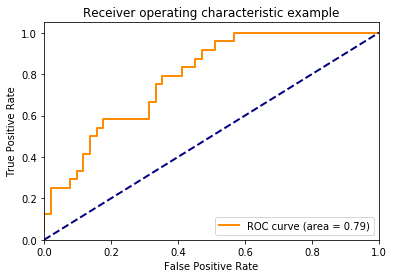

In [96]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [99]:
y_score

array([[-0.76305896, -0.36472635,  0.1239796 ],
       [-0.20238399, -0.63148982, -0.16616656],
       [ 0.11808492, -0.80262259, -0.32062486],
       [-0.90750303, -0.1239792 ,  0.02184016],
       [-0.01108555, -0.27918155, -0.71882525],
       [-0.60521037, -0.34728075, -0.05851787],
       [ 0.02264569, -0.24507866, -0.79094201],
       [-0.61115098,  0.1827259 , -0.57154703],
       [-0.37590649, -0.24062697, -0.38892819],
       [-0.47019698, -0.25733679, -0.27501927],
       [-0.42194767, -0.30275351, -0.28027547],
       [-0.33545871, -0.70306393,  0.02538619],
       [-0.22711497, -0.64064389, -0.13452752],
       [-0.07836815, -0.46342889, -0.45930643],
       [-0.533757  , -0.26521263, -0.20026826],
       [ 0.09973063, -0.55326984, -0.56156984],
       [-0.71354879, -0.04231832, -0.24317009],
       [-0.55067912, -0.13785396, -0.31413579],
       [ 0.37989555, -0.99673681, -0.3909524 ],
       [-0.11088917, -0.91357544,  0.03129667],
       [-0.70721114, -0.06430956, -0.214

In [64]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,